# First TensorFlow Graphs

In this notebook, we execute elementary TensorFlow computational graphs.

#### Load dependencies

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt

#### Simple arithmetic

In [2]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)

In [3]:
sum_op = tf.add(x1, x2)
product_op = tf.multiply(x1, x2)

In [4]:
with tf.Session() as session:
    sum_result = session.run(sum_op, feed_dict={x1: 2.0, x2: 0.5}) # run again with {x1: [2.0, 2.0, 2.0], x2: [0.5, 1.0, 2.0]}
    product_result = session.run(product_op, feed_dict={x1: 2.0, x2: 0.5}) # ...and with {x1: [2.0, 4.0], x2: 0.5}

In [5]:
sum_result

2.5

In [6]:
product_result

1.0

#### Layer of one hundred neurons (derived from Jon Gauthier's [slides](https://docs.google.com/presentation/d/1oB_U_JagxWQdQJlLD80XlNk6fuv42bHV0hfDAPGAbrc/edit#slide=id.p))

In [7]:
# define a placeholder tensor for simulated MNIST digits
x = tf.placeholder(tf.float32, (None, 784))

In [8]:
# create Variable tensors for neuron biases b and weight matrix W
b = tf.Variable(tf.zeros((100,)))
W = tf.Variable(tf.random_uniform((784, 100), -1, 1))

In [9]:
# define the computational graph
z = tf.add(tf.matmul(x, W), b)
a = tf.sigmoid(z)  # first with tf.sigmoid(), then tf.tanh(), tf.nn.relu()

In [10]:
# initialize a session
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    layer_output = session.run(a, {x: np.random.random((1, 784))}) # fetch "a" and feed "x"

In [11]:
layer_output

array([[  2.14992696e-03,   2.99020763e-03,   9.95429397e-01,
          9.99999881e-01,   7.86750615e-01,   1.62361875e-01,
          4.29807663e-01,   1.77888738e-04,   8.71355442e-05,
          3.58231552e-02,   5.61740398e-01,   9.94202435e-01,
          9.76865530e-01,   9.90375340e-01,   9.84366834e-01,
          6.28304556e-02,   1.00000000e+00,   9.99996662e-01,
          2.11844551e-08,   9.99999881e-01,   1.48046252e-04,
          8.53867186e-06,   1.00000000e+00,   5.83484620e-02,
          9.98298705e-01,   1.37030572e-01,   9.94336426e-01,
          9.99997616e-01,   9.99892235e-01,   9.99938250e-01,
          9.99999762e-01,   5.66443354e-08,   1.00000000e+00,
          6.68175101e-01,   9.99422669e-01,   9.99954224e-01,
          9.99980330e-01,   9.99989390e-01,   9.63680446e-01,
          8.25454132e-04,   9.99933839e-01,   9.99717176e-01,
          3.09575852e-02,   9.99970436e-01,   9.99992013e-01,
          9.99779165e-01,   9.99658108e-01,   5.71554853e-03,
        

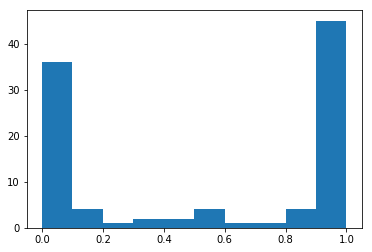

In [12]:
_ = plt.hist(np.transpose(layer_output))